In [51]:
import sympy as sp
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
import matplotlib.pyplot as plt
#from IPython.display import display #подключить, если не работает display

# Занятие 13
# Алгебра

### ООП
### Задание 1.

Создать на основе класса замкнутых ломаных дочерний класс треугольников,
переписать для него метод display так, чтобы выводилось:

треугольник АВС

где имена точек берутся из списка имен вершин ломаной.

Создать треугольники STR и PQS (кординаты точек придумать самим),
вывести треугольники методом display и изобразить их на графике с и без подписей точек.

In [52]:
class Poly_chain:
    
    """ Самостоятельный Poly_chain class """
    _Vertices={}
    def __init__(self, *_Points, _Points_names = None):
        self._Vertices = {}
        _points_number = len(_Points)
        if _points_number > 0:
            for counter in range(_points_number):
                self._Vertices[_Points_names[counter]] = _Points[counter]
        return None
    
    
    def vertices(self):
        return self._Vertices.values()
    
    
    def vertices_names(self):
        return self._Vertices.keys()
    
    
    def named_vertices(self):
        return self._Vertices
    
    
    def plot(self, color = 'red'):
        plt.plot([P.x for P in list(self._Vertices.values())], [P.y for P in list(self._Vertices.values())], color)
        return None
    
    
    def plot_annotated(self, color = 'red'):
        self.plot(color)
        for V_name in (self.named_vertices().keys()):
            chain_point = self.named_vertices()[V_name]
            plt.annotate('$' + V_name + '$', xy = (chain_point.x, chain_point.y), xytext = (0, 5), textcoords = 'offset points' )
        return None

In [73]:
class Closed_Poly_chain(Poly_chain):
    
    def __init__(self, *_Points, _Points_names = None):
        super().__init__(*_Points,_Points_names = _Points_names)
        return None
    
    
    def plot(self,color = 'purple'):
        _V = list(self._Vertices.values())
        _V.append(_V[0])
        plt.plot([P.x for P in list(_V)], [P.y for P in list(_V)], color)
        return None
    
    
    def plot_annotated(self, color = 'purple'):
        self.plot(color)
        for V_name in (self.named_vertices().keys()):
            chain_point = self.named_vertices()[V_name]
            plt.annotate('$' + V_name + '$', xy = (chain_point.x, chain_point.y), xytext = (0, 5), textcoords = 'offset points' )
        return None
    
    
    def display(self):
        print('ломаная( %s на %s)' % (self.length,self.width))
        return None

In [74]:
class Triangle(Closed_Poly_chain):
    
    Points_names = []
    
    
    def __init__(self, *_Points, _Points_names = None):
        if (len(_Points) != 3):
            #Проверяем количество точек
            raise Exception('Chain must be triangle')
        self.Points_names = _Points_names
        super().__init__(*_Points, _Points_names = _Points_names)
        Point_names = _Points_names
        return None
    
    
    def display(self):
        print('Треугольник %s%s%s' % (self.Points_names[0], self.Points_names[1], self.Points_names[2]))
        return None

Треугольник STR
Треугольник PQS


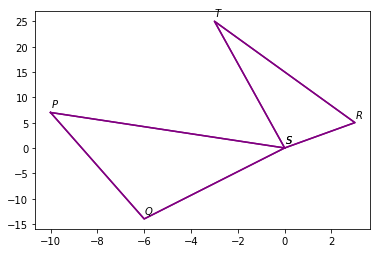

In [75]:
S = sp.Point(0, 0)
T = sp.Point(-3, 25)
R = sp.Point(3, 5)
P = sp.Point(-10, 7)
Q = sp.Point(-6, -14)

STR = Triangle(S, T, R, _Points_names = ['S', 'T', 'R'])
STR.display()
STR.plot()
STR.plot_annotated()

PQS = Triangle(P, Q, S, _Points_names = ['P', 'Q', 'S'])
PQS.display()
PQS.plot()
PQS.plot_annotated()

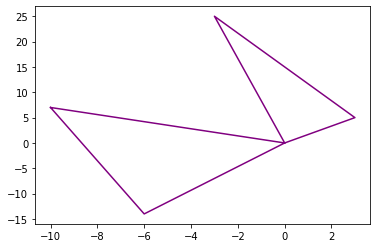

In [76]:
STR.plot()
PQS.plot()

### Задание 2.
Создать на основе класса треугольников классы равносторонних, равнобедренных и прямоугольных треугольников.

В методе display выводить

равносторонний треугольник АВС

равнобедренный треугольник АВС, АВ=ВС

прямоугольный треугольник АВС, угол В прямой

Создать по одному экземпляру треугольника каждого типа

Указание: при вычислении длин сторон не пользоваться округлением, все вычисления проводить аналитически,
для дробей пользуемся конструкцией вида

sp.S(3)/4

In [77]:
class Equilateral_Triangle(Triangle):
    
    Points_names = []
    
    
    def __init__(self, *_Points, _Points_names = None):
        _V = list(_Points)
        l1 = _V[0].distance(_V[1])
        l2 = _V[1].distance(_V[2])
        l3 = _V[2].distance(_V[0])
        if (l1 != l2) or (l2 != l3) or (l1 != l3):
            raise Exception('Triangle must be equilateral')
        self.Points_names = _Points_names
        super().__init__(*_Points, _Points_names = _Points_names)
        Point_names = _Points_names
        return None
    
    
    def display(self):
        print('Равносторонний треугольник %s%s%s' % (self.Points_names[0], self.Points_names[1], self.Points_names[2]))
        return None

In [78]:
A = sp.Point(0, 0)
B = sp.Point(6, 0)
C = sp.Point(3, 3 * sp.sqrt(3))
ABC = Equilateral_Triangle(A, B, C, _Points_names = ['A', 'B', 'C'])
ABC.display()

Равносторонний треугольник ABC


In [79]:
class Isosceles_Triangle(Triangle):
    
    Points_names = []
    
    
    def __init__(self, *_Points,_Points_names=None):
        _V = list(_Points)
        l1 = _V[0].distance(_V[1])
        l2 = _V[1].distance(_V[2])
        l3 = _V[2].distance(_V[0])
        if not((l1 == l2) or (l2 == l3) or (l1 == l3)):
            raise Exception('Triangle must be equilateral')
        self.Points_names = _Points_names
        super().__init__(*_Points,_Points_names = _Points_names)
        Point_names = _Points_names
        return None
    
    
    def display(self):
        _V = list(self._Vertices.values())
        l1 = _V[0].distance(_V[1])
        l2 = _V[1].distance(_V[2])
        l3 = _V[2].distance(_V[0])
        if l1 == l2:
            print('Равнобедренный треугольник %s%s%s, %s%s = %s%s'
                  % (self.Points_names[0], self.Points_names[1], self.Points_names[2], self.Points_names[0], self.Points_names[1],
                    self.Points_names[1], self.Points_names[2]))
        if l1 == l3:
            print('Равнобедренный треугольник %s%s%s, %s%s = %s%s'
                  % (self.Points_names[0], self.Points_names[1], self.Points_names[2], self.Points_names[0], self.Points_names[1],
                    self.Points_names[0], self.Points_names[2]))
        if l2 == l3:
            print('Равнобедренный треугольник %s%s%s, %s%s = %s%s'
                  % (self.Points_names[0], self.Points_names[1], self.Points_names[2], self.Points_names[1], self.Points_names[2],
                    self.Points_names[0], self.Points_names[2]))
        return None

In [80]:
A = sp.Point(0, 0)
B = sp.Point(6, 0)
C = sp.Point(3, 3)
ABC = Isosceles_Triangle(A,B,C,_Points_names = ['A','B','C'])
ABC.display()

Равнобедренный треугольник треугольник ABC, BC = AC


In [81]:
class Right_Triangle(Triangle):
    
    Points_names = []
    
    
    def __init__(self, *_Points,_Points_names = None):
        _V = list(_Points)
        l1 = _V[0].distance(_V[1])
        l2 = _V[1].distance(_V[2])
        l3 = _V[2].distance(_V[0])
        if not((l1**2 + l2**2 == l3**2) or (l2**2 + l3**2 == l1**2) or (l1**2 + l3**2 == l2**2)):
            raise Exception('Triangle must be right')
        self.Points_names = _Points_names
        super().__init__(*_Points, _Points_names = _Points_names)
        Point_names = _Points_names
        return None
    
    
    def display(self):
        _V = list(self._Vertices.values())
        l1 = _V[0].distance(_V[1])
        l2 = _V[1].distance(_V[2])
        l3 = _V[2].distance(_V[0])
        if l1**2 + l2**2 == l3**2:
            print('Прямоугольный треугольник треугольник %s%s%s, угол %s прямой'
                  % (self.Points_names[0], self.Points_names[1], self.Points_names[2], self.Points_names[1]))
        if l2**2 + l3**2 == l1**2:
            print('Прямоугольный треугольник треугольник %s%s%s, угол %s прямой'
                  % (self.Points_names[0], self.Points_names[1], self.Points_names[2], self.Points_names[2]))
        if l1**2 + l3**2 == l2**2:
            print('Прямоугольный треугольник треугольник %s%s%s, угол %s прямой'
                  % (self.Points_names[0], self.Points_names[1], self.Points_names[2], self.Points_names[0]))
        return None

In [82]:
A = sp.Point(0, 0)
B = sp.Point(6, 0)
C = sp.Point(0, 8)
ABC = Right_Triangle(A, B, C, _Points_names=['A', 'B', 'C'])
ABC.display()

Прямоугольный треугольник треугольник ABC,угол A прямой


###  Индивидуальное задание

Построить класс ломаных в пространстве по образцу класса ломаных из файла с примером,

НО:

вершины ломаных хранить в СПИСКЕ list или, если есть желание, в любой другой УПОРЯДОЧЕННОЙ структуре данных.

Реализовать методы plot_xy, plot_xz, plot_yz, изображающие проекции ломаной на соответствующие координатные плоскости (с и без подписей имен точек)

Реализовать метод, проверяющий, является ли некоторая точка вершиной ломаной.

Реализовать добавление и удаление вершин и переименование вершин. При добавлении предусмотреть необязательный параметр - номер вершины, после которой нужно вставить новую.

Работу всех реализованных методов продемонстрировать.

In [83]:
class Poly_chain_3D:
    _Vertices = []
    _Vertices_names = []
    def __init__(self, *_Points, _Points_names = None):
        _points_number = len(_Points)
        self._Vertices = list(_Points)
        if _points_number > 0:
            if _Points_names == None:
                counter = 1
                for _P in _Points:
                    self._Vertices_names.append('A_' + str(counter))
                    counter += 1
            else:
                self._Vertices_names = list(_Points_names)           
        return None
    
    
    def plot_xy(self, color = 'green'):
        plt.plot([P.x for P in self._Vertices],[P.y for P in self._Vertices], color)
        return None
    
    
    def plot_xz(self, color='green'):
        plt.plot([P.x for P in self._Vertices],[P.z for P in self._Vertices], color)
        return None
    
    
    def plot_yz(self, color='green'):
        plt.plot([P.y for P in self._Vertices],[P.z for P in self._Vertices], color)
        return None
    
    
    def is_point_in_chain(self,point):
        k = False
        for i in range(len(self._Vertices)):
            if point.distance(self._Vertices[i]) == 0:
                k = True
        return k
    
    
    def append_point(self, point, point_name, pos = None):
        if pos == None:
            self._Vertices.append(point)
            self._Vertices_names.append(point_name)
        else:
            self._Vertices.append(point)
            self._Vertices_names.append(point_name)
            for i in range(len(self._Vertices) - 1, pos, -1):
                x = self._Vertices[i]
                self._Vertices[i] = self._Vertices[i - 1]
                self._Vertices[i - 1] = x
                x = self._Vertices_names[i]
                self._Vertices_names[i] = self._Vertices_names[i - 1]
                self._Vertices_names[i - 1] = x
                
                
    def del_point(self, point_name):
        for i in range(len(self._Vertices_names)):
            if self._Vertices_names[i] == point_name:
                del self._Vertices_names[i]
                del self._Vertices[i]
                break
                
                
    def rename_point(self,old_name,new_name):
        for i in range(len(self._Vertices_names)):
            if self._Vertices_names[i] == old_name:
                self._Vertices_names[i] = new_name
                
                
    def display(self):
        print(self._Vertices_names)
        print(self._Vertices)

In [84]:
A = sp.Point(2, 2, 8)
B = sp.Point(3, 3, 2)
C = sp.Point(1, 2, 3)
D = sp.Point(-3, -2, -1)
E = sp.Point(3, 3, 3)
Chain = Poly_chain_3D(A, B, C, D, E, _Points_names = ['A', 'B', 'C', 'D', 'E'])

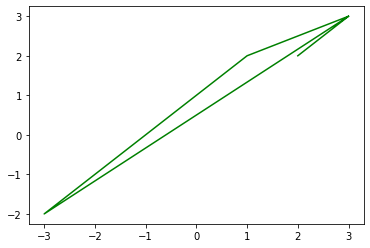

In [85]:
Chain.plot_xy()

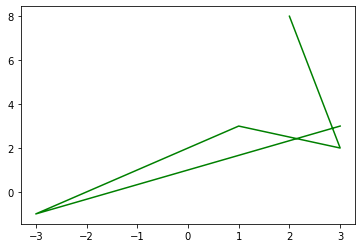

In [86]:
Chain.plot_xz()

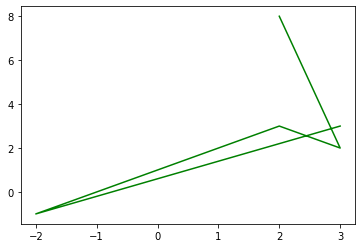

In [87]:
Chain.plot_yz()

In [88]:
display(Chain.is_point_in_chain(sp.Point(33, 13, 32)))
display(Chain.is_point_in_chain(sp.Point(3, 3, 3)))

False

True

In [89]:
Chain.append_point(sp.Point(4, -1, 0), 'K', pos = 0)
Chain.display()

['K', 'A', 'B', 'C', 'D', 'E']
[Point3D(4, -1, 0), Point3D(2, 2, 8), Point3D(3, 3, 2), Point3D(1, 2, 3), Point3D(-3, -2, -1), Point3D(3, 3, 3)]


In [90]:
Chain.rename_point('K', 'T')
Chain.display()

['T', 'A', 'B', 'C', 'D', 'E']
[Point3D(4, -1, 0), Point3D(2, 2, 8), Point3D(3, 3, 2), Point3D(1, 2, 3), Point3D(-3, -2, -1), Point3D(3, 3, 3)]


In [91]:
Chain.del_point('T')
Chain.display()

['A', 'B', 'C', 'D', 'E']
[Point3D(2, 2, 8), Point3D(3, 3, 2), Point3D(1, 2, 3), Point3D(-3, -2, -1), Point3D(3, 3, 3)]
